<a href="https://colab.research.google.com/github/Alamodi123/Alamodi123/blob/main/NLP_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

#Load the 20 Newsgroups dataset
categories = ['rec.sport.hockey', 'sci.space'] # Limit categories for simplicity
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
texts = newsgroups.data[:5] #Take the first 5 documents for demonstration.

#Convert text into a binary matrix using CountVectorizer
# ENTER CODE HERE
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(texts)
vocabulary = vectorizer.get_feature_names_out()

# Convert to DataFrame for better visualization
# ENTER CODE HERE
df = pd.DataFrame(X.toarray(), columns=vocabulary)

# Print the result
# ENTER CODE HERE
print("One-Hot Encoded Feature Matrix:")
print(df)

One-Hot Encoded Feature Matrix:
   00  01  02  03  04  05  06  07  08  09  ...  zamuner  zelepukin  zettler  \
0   1   1   1   1   1   1   1   1   1   1  ...        1          1        1   
1   0   0   0   0   0   0   0   0   0   0  ...        0          0        0   
2   0   0   0   0   0   0   0   0   0   0  ...        0          0        0   
3   0   0   0   0   0   0   0   0   0   0  ...        0          0        0   
4   0   0   0   0   0   0   0   0   0   0  ...        0          0        0   

   zezel  zhamnov  zhitnik  zholtok  zmolek  zombo  zubov  
0      1        1        1        1       1      1      1  
1      0        0        0        0       0      0      0  
2      0        0        0        0       0      0      0  
3      0        0        0        0       0      0      0  
4      0        0        0        0       0      0      0  

[5 rows x 1209 columns]


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import movie_reviews
import nltk
import pandas as pd

# Download and load IMDB movie reviews dataset
nltk.download('movie_reviews')
documents = [" ".join(movie_reviews.words(fileid)) for fileid in
             movie_reviews.fileids()[:5]] # Use 5 reviews for simplicity

# Compute TF-IDF
# ENTER CODE HERE
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

#Convert to DataFrame
# ENTER CODE HERE
feature_names = tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Print the TF-IDF Feature Matrix
# ENTER CODE HERE
print("TF-IDF Feature Matrix:")
print(df)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


TF-IDF Feature Matrix:
         10      1960     1990s      1997        20      20th       90s  \
0  0.252859  0.000000  0.000000  0.000000  0.025286  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.062397  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.038642  0.000000  0.038642  0.038642   
4  0.000000  0.000000  0.022812  0.000000  0.000000  0.000000  0.000000   

       able       abo     about  ...     write   written     wrong       y2k  \
0  0.000000  0.000000  0.040801  ...  0.020400  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.062024   
2  0.000000  0.000000  0.000000  ...  0.000000  0.031198  0.031198  0.000000   
3  0.038642  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.045624  0.092022  ...  0.018404  0.000000  0.000000  0.000000   

       year     years       yet       you    

In [5]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 47.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Extracted N-Grams (Unigrams, Bigrams, and Trigrams):
['00' '00 01' '00 01 gmt' ... 'zoology lines 21' 'zoology lines 35'
 'zoology lines 36']


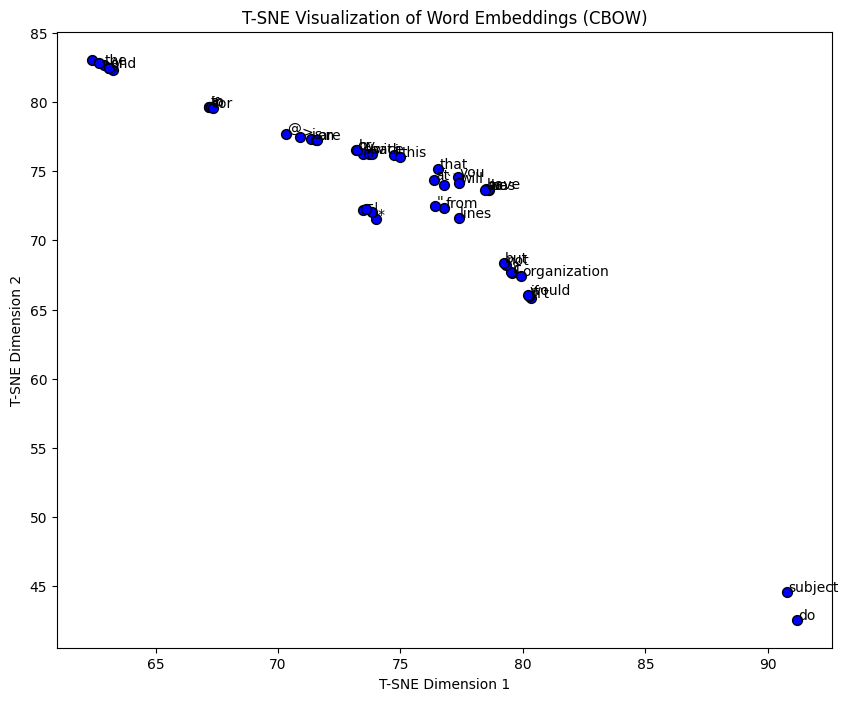

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Download NLTK resources if not already done (optional, but good practice)
nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

#Load the 20 Newsgroups dataset
categories = ['sci.space']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
texts = newsgroups.data[:100] # Use the first 100 documents

# Step 1: Extract N-Grams
# ENTER CODE HERE
vectorizer = CountVectorizer(ngram_range=(1,3))
matrix = vectorizer.fit_transform(texts)
features = vectorizer.get_feature_names_out()

# Print N-Grams
# ENTER CODE HERE
print("Extracted N-Grams (Unigrams, Bigrams, and Trigrams):")
print(features)

# Step 2: Tokenize Text for Word2Vec
# ENTER CODE HERE
# Tokenize each document into a list of words, converting to lowercase
tokenized_sentences = [word_tokenize(text.lower()) for text in texts]

# Step 3: Train Word2Vec Model (CBOW) - Default is CBOW (sg=0)
# ENTER CODE HERE
# CBOW: sg=0 is the default. vector_size=50 for the embedding dimension.
model_cbow = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, sg=0)
model = model_cbow # Alias to use the rest of the provided code structure

# You can also train the Skip-Gram model for comparison (sg=1)
# model_skipgram = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, sg=1)

#Step 4: Extract Word Embeddings for Visualization
words = list(model.wv.index_to_key) # Vocabulary words
embeddings = np.array([model.wv[word] for word in words]) # Embedding vectors

#Step 5: Reduce Dimensionality with T-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5) #T-SNE for 2D visualization
embeddings_2d = tsne.fit_transform(embeddings)

#Step 6: Visualize Word Embeddings
plt.figure(figsize=(10,8))
for i, word in enumerate(words[:50]): # Visualize only the first 50 words for clarity
    x, y = embeddings_2d[i]
    plt.scatter(x, y, c='blue', edgecolors='k', s=50)
    plt.text(x + 0.05, y + 0.05, word, fontsize=10)
plt.title("T-SNE Visualization of Word Embeddings (CBOW)")
plt.xlabel("T-SNE Dimension 1")
plt.ylabel("T-SNE Dimension 2")
plt.show()